In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from sklearn.linear_model import LinearRegression
init_printing(use_unicode=True)

In [2]:
# reads in data from a csv or txt file
# format is x1, x2, x3, y
# returns X, y

def read_data(data):
    pts = np.genfromtxt(data, delimiter=',')
    try:
        d = len(pts[0]) - 1
        n = len(pts)
        X = pts[:,:-1]
        y = pts[:,-1:]
    except:
        d = len(pts) - 1
        n = 1
        X = pts[:-1].reshape(n,d)
        y = pts[-1].reshape(n,1)
    return(X,y)

In [3]:
# reads in data from a 2d array
# format is [[x1,x2,x3,y], [x1,x2,x3,y]]
# returns X, y

def create_dataset(pts):
    try:
        d = len(pts[0]) - 1
        n = len(pts)
        X = pts[:,:-1]
        y = pts[:,-1:]
    except:
        d = len(pts) - 1
        n = 1
        X = pts[:-1].reshape(n,d)
        y = pts[-1].reshape(n,1)
    return(X,y)

## N known, no intercept, N = 1, D = 1

In [4]:
x_1, x_2, x_3, y_1, y_2, y_3, theta_1, theta_2, theta_3 = symbols('x^{(1)} x^{(2)} x^{(3}} y^{(1)} y^{(2)} y^{(3)} \Theta^{(1)} \Theta^{(2)} \Theta^{(3)}')

In [5]:
X = Matrix([x_1, x_2]).T
y = Matrix([y_1, y_2])

In [6]:
def normal(X, y):
    XT = X.T
    XTX = XT*X
    XTX_inv = XTX**-1
    XTy = XT*y
    return XTX_inv * XTy

In [7]:
def update_normal(X_full, y_full, X_obscured, y_obscured, original_n):
    #update this so it works based on number of pts and number of dimensions
    # i think i can make this faster maybe? using some sort of optimization
    try:
        n,d = X.shape
        #X_list, y_list = X_full.tolist(), y_full.tolist()
        theta_full = []
        lefts = []
        original_X, original_y = X_full[:original_n,:], y_full[:original_n,:]
        original_X_obs, original_y_obs = X_obscured[:original_n,:], y_obscured[:original_n,:]

        lm = LinearRegression(fit_intercept=False)

        lm.fit(original_X, original_y)
        theta_full.append(lm.coef_[0])
        for i in range(original_n+1, n+1):
            try:
                updated_X, updated_y = X_full[:i,:], y_full[:i,:]
                updated_X_obs, updated_y_obs = X_obscured[:i,:], y_obscured[:i,:]

                lm.fit(updated_X, updated_y)
                theta_full.append(lm.coef_[0])

                left = normal(updated_X_obs, updated_y_obs)
                lefts.append(left)
            except:
                continue
        sys_eqs = []
        diff = len(theta_full) - len(lefts)
        print(diff)
        for i in range(len(lefts)):
            for j in range(d):
                eq = lefts[i][j] - theta_full[i+diff][j]
                sys_eqs.append(eq)
        return theta_full, lefts, sys_eqs
        #return theta_full, lefts
        #return solvers.solve(sys_eqs)
        #return nonlinsolve(sys_eqs, [x_1,x_2,x_3,y_1])
    except:
        print("No solution, I think")

## N = 1, D = 1, N known, no intercept

can you learn size of n?

In [38]:
X = Matrix([[0],[1]])
y = Matrix([0,3])
X_obs = Matrix([[x_1],[1]])
y_obs = Matrix([y_1,3])

In [39]:
sols = update_normal(X,y,X_obs,y_obs,1)

1


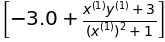

In [42]:
sols[2]

In [43]:
solvers.solve(sols[2])

In [31]:
sols[0]

[array([0.]), array([3.])]

In [ ]:
sols

In [43]:
sols[1][x_1].subs(y_1, 3*x_1)

In [25]:
X = Matrix([[3],[1]])
y = Matrix([5,3])
X_obs = Matrix([[x_1],[1]])
y_obs = Matrix([y_1,3])

In [26]:
sols = update_normal(X,y,X_obs,y_obs,1)

1


In [27]:
sols[1]

⎡⎡x__{(1)}⋅y__{(1)} + 3⎤⎤
⎢⎢─────────────────────⎥⎥
⎢⎢            2        ⎥⎥
⎣⎣    x__{(1)}  + 1    ⎦⎦

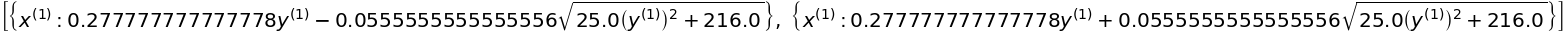

In [47]:
sols

In [13]:
# should not have a solution
X = Matrix([[3,4],[1,2]])
y = Matrix([5,3])
X_obs = Matrix([[x_1,x_2],[1,2]])
y_obs = Matrix([y_1,3])

In [14]:
sols = update_normal(X,y,X_obs,y_obs,1)

1


In [16]:
sols[1]

⎡⎡                                                                            
⎢⎢       (x__{(1)}⋅x__{(2)} + 2)⋅(x__{(2)}⋅y__{(1)} + 6)         (x__{(1)}⋅y__
⎢⎢- ────────────────────────────────────────────────────────── + ─────────────
⎢⎢  ⎛        2    ⎞ ⎛        2    ⎞                          2                
⎢⎢  ⎝x__{(1)}  + 1⎠⋅⎝x__{(2)}  + 4⎠ - (x__{(1)}⋅x__{(2)} + 2)                 
⎢⎢                                                                            
⎢⎢                                                ⎛        2    ⎞             
⎢⎢                                                ⎝x__{(1)}  + 1⎠⋅(x__{(2)}⋅y_
⎢⎢                                       ─────────────────────────────────────
⎢⎢                                       ⎛        2    ⎞ ⎛        2    ⎞      
⎣⎣                                       ⎝x__{(1)}  + 1⎠⋅⎝x__{(2)}  + 4⎠ - (x_

           ⎛⎛        2    ⎞ ⎛        2    ⎞                                   
{(1)} + 3)⋅⎝⎝x__{(1)}  + 1⎠⋅⎝x__{(2)}  + 4⎠ - (-x__

In [32]:
# need additional pt to get solution
X = Matrix([[3,4],[1,2],[2,3]])
y = Matrix([5,3,5])
X_obs = Matrix([[x_1,x_2],[1,2],[2,3]])
y_obs = Matrix([y_1,3,5])

In [33]:
sols = update_normal(X,y,X_obs,y_obs,1)

1


In [34]:
sols[0]

[array([0.6, 0.8]), array([-1.,  2.]), array([-1.33333333,  2.33333333])]

In [35]:
sols[1]

⎡⎡                                                                            
⎢⎢       (x__{(1)}⋅x__{(2)} + 2)⋅(x__{(2)}⋅y__{(1)} + 6)         (x__{(1)}⋅y__
⎢⎢- ────────────────────────────────────────────────────────── + ─────────────
⎢⎢  ⎛        2    ⎞ ⎛        2    ⎞                          2                
⎢⎢  ⎝x__{(1)}  + 1⎠⋅⎝x__{(2)}  + 4⎠ - (x__{(1)}⋅x__{(2)} + 2)                 
⎢⎢                                                                            
⎢⎢                                                ⎛        2    ⎞             
⎢⎢                                                ⎝x__{(1)}  + 1⎠⋅(x__{(2)}⋅y_
⎢⎢                                       ─────────────────────────────────────
⎢⎢                                       ⎛        2    ⎞ ⎛        2    ⎞      
⎣⎣                                       ⎝x__{(1)}  + 1⎠⋅⎝x__{(2)}  + 4⎠ - (x_

           ⎛⎛        2    ⎞ ⎛        2    ⎞                                   
{(1)} + 3)⋅⎝⎝x__{(1)}  + 1⎠⋅⎝x__{(2)}  + 4⎠ - (-x__

In [36]:
solvers.solve(sols[2])

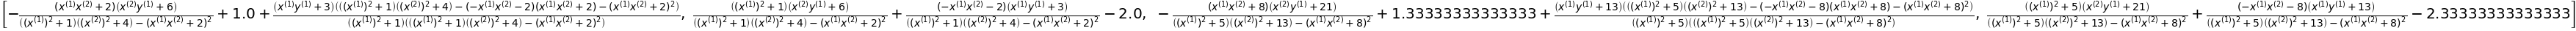

In [37]:
sols[2]

In [96]:
X = Matrix([[1,0],[0,1],[1,1],[3,2]])
y = Matrix([1,1,1,2])
X_obs = Matrix([[x_1,x_2],[0,1],[1,1],[1,2]])
y_obs = Matrix([y_1,0,1,2])

In [97]:
sols = update_normal(X,y,X_obs,y_obs,1)

1


In [98]:
sols[0]

[array([1., 0.]),
 array([1., 1.]),
 array([0.66666667, 0.66666667]),
 array([0.35294118, 0.58823529])]

In [57]:
X = Matrix([[4],[1]])
y = Matrix([6,10])
X_obs = Matrix([[x_1],[1]])
y_obs = Matrix([y_1,10])

In [58]:
sols = update_normal(X,y,X_obs,y_obs,1)

1


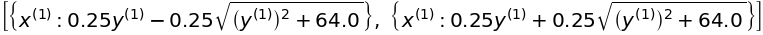

In [59]:
sols

In [44]:
X = Matrix([[3,4,5],[1,2,3],[9,3,1],[-4,2,4]])
y = Matrix([6,4,-4,1])
X_obs = Matrix([[x_1,x_2,x_3],[1,2,3],[9,3,1],[-4,2,4]])
y_obs = Matrix([y_1,4,-4,1])

In [45]:
sols = update_normal(X,y,X_obs,y_obs,1)

2


In [46]:
sols[0]

[array([0.36, 0.48, 0.6 ]),
 array([-0.66666667,  0.33333333,  1.33333333]),
 array([-0.75,  0.5 ,  1.25]),
 array([  2.49137931, -11.5       ,   8.62931034])]

In [72]:
sols[2][0]

                                                                              
                          ⎛                           ⎛⎛        2     ⎞       
  (x__{(3}}⋅y__{(1)} + 8)⋅⎝- (x__{(1)}⋅x__{(2)} + 29)⋅⎝⎝x__{(1)}  + 82⎠⋅(x__{(
- ────────────────────────────────────────────────────────────────────────────
                                                                              
        ⎛⎛        2     ⎞ ⎛        2     ⎞                           2⎞ ⎛⎛    
        ⎝⎝x__{(1)}  + 82⎠⋅⎝x__{(2)}  + 13⎠ - (x__{(1)}⋅x__{(2)} + 29) ⎠⋅⎝⎝x__{

                                                                              
                                                                     ⎞        
2)}⋅x__{(3}} + 9) - (x__{(1)}⋅x__{(2)} + 29)⋅(x__{(1)}⋅x__{(3}} + 12)⎠ + (x__{
──────────────────────────────────────────────────────────────────────────────
                                                                              
    2     ⎞ ⎛        2     ⎞                       

In [47]:
x_4 = symbols('x^{(4)}')

In [48]:
x_4

In [55]:
X = Matrix([[3,4,5,2],[1,2,3,4],[9,3,1,9],[-4,2,4,-3]])
y = Matrix([6,4,-4,1])
X_obs = Matrix([[x_1,x_2,x_3,x_4],[1,2,3,4],[9,3,1,9],[-4,2,4,-3]])
y_obs = Matrix([y_1,4,-4,1])

In [56]:
sols = update_normal(X,y,X_obs,y_obs,1)

3


In [57]:
sols[0]

[array([0.33333333, 0.44444444, 0.55555556, 0.22222222]),
 array([0.31034483, 0.43103448, 0.55172414, 0.29310345]),
 array([-0.76107011,  0.53505535,  1.22785978,  0.00184502]),
 array([  3.61363636, -13.31818182,   9.97727273,  -0.72727273])]

In [81]:
X = Matrix([[3,4,5,10],[1,2,3,4],[6,7,0,-2],[-4,2,4,2],[8,8,2,1]])
y = Matrix([6,4,-4,1,8])
X_obs = Matrix([[x_1,x_2,x_3,x_4],[1,2,3,4],[9,3,1,2],[-4,2,4,2],[8,8,2,1]])
y_obs = Matrix([y_1,4,-4,1,8])

In [82]:
sols = update_normal(X,y,X_obs,y_obs,1)

3


In [83]:
sols[0]

[array([0.12, 0.16, 0.2 , 0.4 ]),
 array([-0.33333333,  0.5       ,  1.33333333, -0.16666667]),
 array([-0.72607261,  0.07260726,  1.42574257,  0.07590759]),
 array([ 1.25      , -1.74324324,  2.5472973 , -0.35135135]),
 array([ 3.316588  , -3.82734145,  6.39711467, -2.10799588])]

In [84]:
X = Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0]])
y = Matrix([1,1,0,1,0])
X_obs = Matrix([[x_1,x_2,x_3,x_4],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0]])
y_obs = Matrix([y_1,1,0,1,0])

In [85]:
sols = update_normal(X,y,X_obs,y_obs,1)

3


In [86]:
sols[0]

[array([1., 0., 0., 0.]),
 array([1., 1., 0., 0.]),
 array([1., 1., 0., 0.]),
 array([1., 1., 0., 1.]),
 array([0.33333333, 0.33333333, 0.        , 1.        ])]

# have to sub first for some reason

In [ ]:
solvers.solve(sols[0].subs(y_1, 1.5*x_1))

In [64]:
.1379*6-.2828*3+1.3656*4

In [65]:
197493/191326